In [1]:
import pandas as pd
file = pd.read_csv('C:/datasetcasas/credit_risk_dataset.csv')
file.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
nullset = file.isnull().sum()
nullsetpercen = (file.isnull().sum() / len(file['loan_status'])) * 100
print(nullsetpercen)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [3]:
file['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [4]:
file['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [5]:
file['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [6]:
file['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [7]:
file['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

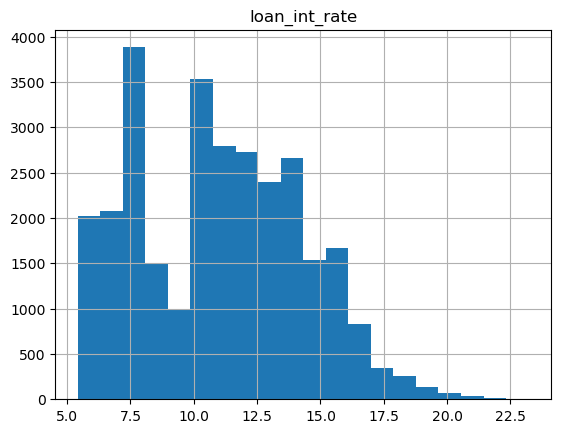

In [8]:
import matplotlib.pyplot as plt
file.hist(column=['loan_int_rate'], bins=20)
plt.show()

In [9]:
file['loan_int_rate'] = file['loan_int_rate'].fillna(file['loan_int_rate'].mean())

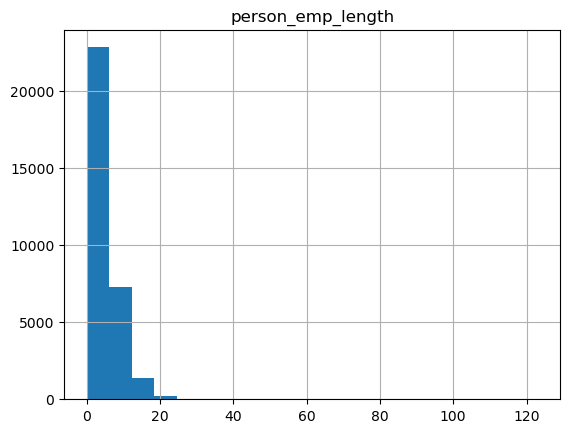

In [10]:
import matplotlib.pyplot as plt
file.hist(column=['person_emp_length'], bins=20)
plt.show()

In [11]:
file['person_emp_length'] = file['person_emp_length'].fillna(file['person_emp_length'].median())

In [12]:
nullset = file.isnull().sum()
nullsetpercen = (file.isnull().sum() / len(file['loan_status'])) * 100
print(nullsetpercen)

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64


In [13]:
file.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
file['cb_person_default_on_file'] = file['cb_person_default_on_file'].replace('Y', 1)
file['cb_person_default_on_file'] = file['cb_person_default_on_file'].replace('N', 0)

In [15]:
file.head()    

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4


In [16]:
personhome_dummies = pd.get_dummies(file['person_home_ownership'], drop_first=True, dtype=int)
loanintent_dummies = pd.get_dummies(file['loan_intent'], drop_first=True, dtype=int)
loangrade_dummies = pd.get_dummies(file['loan_grade'], drop_first=True, dtype=int)

fileconcat = pd.concat([file, personhome_dummies, loanintent_dummies, loangrade_dummies], axis=1)

fileconcat.drop('person_home_ownership', axis=1, inplace=True)
fileconcat.drop('loan_intent', axis=1, inplace=True)
fileconcat.drop('loan_grade', axis=1, inplace=True)


In [17]:
fileconcat.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
y = fileconcat['loan_status']
x = fileconcat.drop('loan_status', axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_test,y_test)
score = model.score(x_train,y_train)
print(score)


0.8018503902481803


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_test,y_test)
score = model.score(x_train,y_train)
print(score)

0.9242304656669298


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_test,y_test)
score = model.score(x_train,y_train)
print(score)

0.9163378058405682


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('Classifier', RandomForestClassifier(random_state=1))])

params = [
    {
        'Classifier' : [GradientBoostingClassifier(random_state=1)],
        'Classifier__n_estimators': [50, 100, 500],
        'Classifier__min_samples_split': [1,2,3,4],
        'Classifier__min_samples_leaf': [1,2,3,4],
    },
    {
        'Classifier' : [LogisticRegression(random_state=1)],
        'Classifier__C': [0.5,1],
    }
]

In [ ]:
grid_search = GridSearchCV(pipe, params, cv = 2, scoring = 'neg_mean_absolute_error', verbose = 2, n_jobs= -1)

grid_search.fit(x_train,y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_model)
print(best_params)
print(best_score)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\anaconda

In [ ]:
finalmodel = GradientBoostingClassifier(min_samples_leaf=1,n_estimators=500,random_state=1,min_samples_split=2)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
print(score)

In [ ]:
import pickle
with open('loan.pkl', 'wb') as file:
    pickle.dump(finalmodel, file)

In [ ]:
with open('loan.pkl', 'rb') as f:
    model = pickle.load(f)    

In [ ]:
model.fit(x_test, y_test)
previsao = model.predict(x_train)
print(previsao)